In [17]:
import spacy
import pandas as pd
from spacy.training.example import Example
import random
from spacy.util import minibatch, compounding
nlp = spacy.load("es_core_news_lg")
# Getting the pipeline component
ner=nlp.get_pipe("ner")


In [18]:
df = pd.read_csv("tweets_DEF_GOD.csv")
df_random = df.sample(n=50, random_state=42)
df_random = df_random.reset_index()

In [19]:
#df_random.to_csv("COMPLETE_sample.csv")
df_random = pd.read_csv("COMPLETE_sample.csv")

In [134]:
TRAIN_DATA = [("cuidadodelagua sin suministro de agua en la colonia bosques de la huasteca santacatarina vía nessspartan cc aydmonterrey", {"entities":[(44, 74, "LOC"), (75, 89, "LOC"), (108,120, "ORG")]}),
              ("cuidadodelagua servicio de agua con aspecto turbio en la colonia vista hermosa monterrey vía carmengina cc aydmonterrey",{"entities":[(57, 78, "LOC"), (79, 88, "LOC"), (107, 119, "ORG")]}),
              ("cuidadodelagua sin suministro de agua en la colonia villas del mirador", {"entities":[(44, 70, "LOC")]}),
              ("peligro en el parque de la huasteca. Un coche se volcó.",{"entities":[(14, 35, "LOC")]}),
              ("Atención en col. San franciso de asis hay mucho trafico.", {"entities":[(12, 38, "LOC")]}), 
              ("la col del valle se encuentra inundada, no manejes por ahi",{"entities":[(3, 16, "LOC")]}), 
              ("fuertes lluvias en la av grza sada y reporte de inundación en col nuevo mexico",{"entities":[(22, 34, "LOC"), (62, 78, "LOC")]}),
              ("fuertes lluvias en avenida lincon, extrema precacaución con avenidas grandes",{"entities":[(19, 33, "LOC")]}),
              ("la avenidad gonzalitos que conecta con la colonia del valle esta repleta de coches",{"entities":[(3, 22, "LOC"), (42, 59, "LOC")]}),
              (df_random["Texto"][0],{"entities" : [(55, 57, "LOC"), (125,140, "LOC"), (141,150, "LOC"), (151, 153, "LOC")]}),
              (df_random["Texto"][1],{"entities" : [(43, 50, "LOC")]}),
              (df_random["Texto"][3],{"entities" : [(65, 84, "LOC"), (91, 120, "LOC"), (189, 199, "LOC"), (203,214, "ORG"), (215,220, "ORG")]}),
              (df_random["Texto"][4],{"entities" : [(20,34, "LOC"), (37,53, "LOC"), (148, 152, "LOC"), (153, 157, "ORG")]}),
              (df_random["Texto"][5],{"entities" : [(45, 55, "LOC"), (127, 143, "LOC"), (179, 192, "ORG")]}),
              (df_random["Texto"][6],{"entities" : [(20, 38, "LOC"), (48, 58, "LOC"), (152, 156, "LOC"), (157 ,161, "ORG")]}),
              (df_random["Texto"][7],{"entities" : [(40, 58, "LOC"), (67, 84 , "LOC"), (88, 97, "LOC"), (98, 100, "LOC"), (209 ,218, "ORG"), (219, 229, "ORG"), (229, 243, "ORG")]}),
              (df_random["Texto"][8],{"entities" : [(74, 96, "LOC"), (109, 128, "LOC"), (128, 132, "LOC"), (133, 137, "ORG")]}),
              (df_random["Texto"][10],{"entities" : [(72, 83, "LOC"), (86 ,104, "LOC"), (192, 201, "LOC"), (255, 260, "ORG"), (261, 273, "ORG")]}),
              (df_random["Texto"][11],{"entities" : [(77, 80, "LOC")]}),
              (df_random["Texto"][12],{"entities" : [(32, 42,"LOC")]}),
              (df_random["Texto"][15],{"entities" : [(32, 46, "LOC"), (129, 136, "LOC")]}),
              (df_random["Texto"][17],{"entities" : [(35, 55, "LOC"), (58 ,77, "LOC"), (149, 167, "LOC")]}),
              (df_random["Texto"][16],{"entities" : [(6, 15, "LOC")]}),
              (df_random["Texto"][18],{"entities" : [(44, 57, "LOC"), (62, 78, "LOC")]}),
              (df_random["Texto"][35],{"entities" : [(29, 39, "LOC"), (40, 47, "LOC")]}),
              ("cuidado en la av revolucion con cruce en av gonzalitos",{"entities":[(14, 28, "LOC"), (40, 54, "LOC")]}),
              ("col nuevo mexico en peligro, atentos residentes de monterrey ocurrio algo cerca de la ave ignacio a",{"entities":[(0 ,16, "LOC"), (51, 60, "LOC"), (86, 99, "LOC")]})
              ]
# Adding labels to the `ner`
for _, annotations in TRAIN_DATA:
  for ent in annotations.get("entities"):
    ner.add_label(ent[2])


In [141]:
st = df_random["Texto"][27]
print(st)
print(st[40:47])

fuerte lluvia en la rotonda de solidaridad en monterrey
ad en m


In [133]:
st ="col nuevo mexico en peligro, atentos residentes de monterrey ocurrio algo cerca de la ave ignacio a"
print(st[86:99])

ave ignacio a


In [135]:

pipe_exceptions = ["ner"]
unaffected_pipes = [pipe for pipe in nlp.pipe_names if pipe not in pipe_exceptions]

# Training the model
with nlp.disable_pipes(*unaffected_pipes):  # Only train NER
    optimizer = nlp.begin_training()
    for iteration in range(250):
        random.shuffle(TRAIN_DATA)
        losses = {}
        
        # Batch up the examples using spaCy's minibatch
        batches = minibatch(TRAIN_DATA, size=compounding(4.0, 32.0, 1.001))
        for batch in batches:
            texts, annotations = zip(*batch)
            
            # Convert to Example objects
            examples = []
            for i in range(len(texts)):
                doc = nlp.make_doc(texts[i])
                example = Example.from_dict(doc, annotations[i])
                examples.append(example)
            
            # Update the model with the Example objects
            nlp.update(examples, drop=0.5, losses=losses)
        
        print(f"Iteration {iteration}: Losses", losses)
    

c:\Users\lol_a\AppData\Local\Programs\Python\Python39\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "cuidado en la av revolucion con cruce en av gonzal..." with entities "[(14, 28, 'LOC'), (40, 54, 'LOC')]". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
c:\Users\lol_a\AppData\Local\Programs\Python\Python39\lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "cuidadodelagua sin suministro de agua en la coloni..." with entities "[(44, 74, 'LOC'), (75, 89, 'LOC'), (108, 120, 'ORG...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
c:\Users\lol_a\AppData\Local\Programs\Python\Python39\lib\site-packages\spa

Iteration 0: Losses {'ner': 458.79452619701624}
Iteration 1: Losses {'ner': 273.1027801334858}
Iteration 2: Losses {'ner': 114.5329694442355}
Iteration 3: Losses {'ner': 113.08519319133848}
Iteration 4: Losses {'ner': 103.74888092960464}
Iteration 5: Losses {'ner': 101.87035232838855}
Iteration 6: Losses {'ner': 94.16277741714475}
Iteration 7: Losses {'ner': 95.85988333347859}
Iteration 8: Losses {'ner': 146.60226480986907}
Iteration 9: Losses {'ner': 131.41790954699604}
Iteration 10: Losses {'ner': 88.70039125730727}
Iteration 11: Losses {'ner': 82.94060974378633}
Iteration 12: Losses {'ner': 78.14160995482906}
Iteration 13: Losses {'ner': 84.85761776772118}
Iteration 14: Losses {'ner': 80.23409015833542}
Iteration 15: Losses {'ner': 73.54635014552933}
Iteration 16: Losses {'ner': 64.80685630927546}
Iteration 17: Losses {'ner': 70.29467462294343}
Iteration 18: Losses {'ner': 69.95122803803645}
Iteration 19: Losses {'ner': 57.568265050208375}
Iteration 20: Losses {'ner': 64.85457784741

In [136]:
# Testing the model
doc = nlp("fuertes lluvias en la colonia bosques de la huaeca cerca de monterrey cerca de la av lincoln")
print("Entities", [(ent.text, ent.label_) for ent in doc.ents])

Entities [('colonia bosques de la huaeca', 'LOC'), ('av lincoln', 'LOC')]


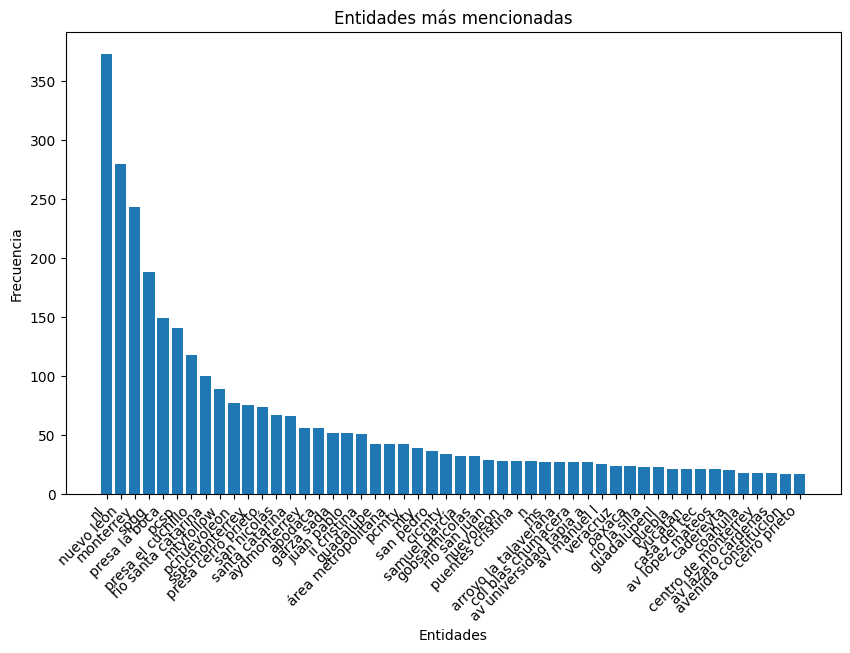

In [137]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

df = pd.read_csv("tweets_DEF_GOD.csv")
# Inicializar un Counter para contar las entidades
ent_counter = Counter()

# Crear una lista para almacenar las entidades de cada texto
entidades_list = []

# Procesar cada texto en la columna 'Texto'
for texto in df['Texto']:
    doc = nlp(texto)
    entidades = [ent.text for ent in doc.ents]
    entidades_list.append(entidades)
    # Contar las entidades para el histograma
    for ent in doc.ents:
        ent_counter[ent.text] += 1

# Añadir la columna 'entidades' al DataFrame
df['entidades'] = entidades_list

# Guardar el DataFrame con la nueva columna en un archivo CSV
df.to_csv('df_con_entidades_TEST.csv', index=False)

# Crear un histograma con las entidades más mencionadas
most_common_ents = ent_counter.most_common(50)  
# Separar las entidades y sus frecuencias
entities, counts = zip(*most_common_ents)

# Generar el histograma
plt.figure(figsize=(10, 6))
plt.bar(entities, counts)
plt.xticks(rotation=45, ha='right')
plt.title('Entidades más mencionadas')
plt.xlabel('Entidades')
plt.ylabel('Frecuencia')
plt.show()

In [138]:
# Save the  model to directory
path = "D:\home\[00]_Projects\[00]_Extracurricular\Spacy\model"
nlp.to_disk(path)
print("Saved model")


Saved model


In [139]:

# Load the saved model and predict
print("Loading from", path)
nlp_updated = spacy.load(path)
doc = nlp_updated("los trabajos de limpieza de rejillas en el municipio de guadalupenl continuaron durante todo este jueves para ayudar al flujo de agua en los siguientes puntos av pablo livas frente al estadio bbva av morones prieto a la altura de corregidora,")
print("Entities", [(ent.text, ent.label_) for ent in doc.ents])

Loading from D:\home\[00]_Projects\[00]_Extracurricular\Spacy\model
Entities [('guadalupenl', 'LOC'), ('av pablo livas', 'LOC'), ('estadio bbva', 'LOC'), ('av', 'LOC')]
